# CBSA Predictive model
1) Polynomial Regression
2) Lasso Regression
3) Ridge Regression
Using: Sk-learn package

Precedures:

1) Data cleaning: extract useful data from dataset, saved those data as csv. Import those data.csv to kernal

2) Training-validation-testing set split

3) Evaluate the accuracy of different model

4) Train predictive models

5) Data visualization

***data cleaning 

first choose the model, then cross validation

third party information 

final -> time(yyyy-mm-dd)

-> can choose diff y

organize via config -> switch on diff steps -> pipline调试

分工 -> data cleaning, train model -> research -> write report 

MAPE and MSE and MASE used to measure model

Data cleaning
Data transformation
Data reduction
Data discretization 
Text cleaning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [2]:
data=pd.read_csv('封關_final.csv')
data


,year,month,day,網紅博客,網民,匿名,媒體,機構及社群,政界人士,企業品牌,...,manual_equ,manualemo_score,correlation_keyword0,correlation_value0,correlation_keyword1,correlation_value1,correlation_keyword2,correlation_value2,arrival_total,departure_total
0,2020,2,12,7,11,2,5,6,9,0,...,0,-0.529412,鄭月,12,接觸,11,武漢,6,1.565,0.985
1,2020,2,13,2,9,0,2,1,2,0,...,0,-0.142857,香港,4,口罩,3,智遠,2,1.466,4.806
2,2020,2,14,2,3,0,2,4,2,0,...,0,0.000000,香港,3,悲劇,2,數字,2,16.521,21.541
3,2020,2,15,2,3,0,1,2,1,0,...,0,0.600000,行動,5,工會,4,口罩,2,16.764,22.339
4,2020,2,16,2,2,0,1,0,0,0,...,0,1.000000,香港,3,應該,1,醫護,1,19.509,20.410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,2020,11,26,0,0,0,0,0,0,0,...,0,0.000000,NaN,0,NaN,0,NaN,0,1.993,2.154
289,2020,11,27,0,0,0,0,0,0,0,...,0,0.000000,NaN,0,NaN,0,NaN,0,1.810,2.196
290,2020,11,28,0,0,0,0,0,0,0,...,0,0.000000,NaN,0,NaN,0,NaN,0,2.100,2.693
291,2020,11,29,0,0,0,0,0,0,0,...,0,0.000000,NaN,0,NaN,0,NaN,0,2.090,2.419


In [3]:
data.describe()

,year,month,day,網紅博客,網民,匿名,媒體,機構及社群,政界人士,企業品牌,...,emo_score,manual_pos,manual_neg,manual_equ,manualemo_score,correlation_value0,correlation_value1,correlation_value2,arrival_total,departure_total
count,293.0,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,...,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000
mean,2020.0,6.686007,16.071672,0.170648,1.174061,0.068259,0.358362,0.225256,0.139932,0.017065,...,0.214904,0.464164,0.430034,0.013652,-0.003385,0.993174,0.873720,0.375427,5.808843,5.102464
std,0.0,2.776561,8.732614,0.665869,4.051096,0.334310,1.223867,0.825810,0.665343,0.129735,...,0.407383,2.009288,1.491776,0.116239,0.346991,3.203159,2.782238,0.997777,12.788678,9.608678
min,2020.0,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2020.0,4.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.465000,1.151000
50%,2020.0,7.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.956000,2.099000
75%,2020.0,9.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.384000,3.360000
max,2020.0,11.000000,31.000000,7.000000,53.000000,3.000000,11.000000,8.000000,9.000000,1.000000,...,1.000000,28.000000,13.000000,1.000000,1.000000,41.000000,34.000000,9.000000,131.004000,86.081000


In [4]:
corr = data.corr()

corr.style.background_gradient(cmap='coolwarm')

C:\Users\elain\anaconda3\lib\site-packages\pandas\io\formats\style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
C:\Users\elain\anaconda3\lib\site-packages\pandas\io\formats\style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,year,month,day,網紅博客,網民,匿名,媒體,機構及社群,政界人士,企業品牌,演藝明星,商界名人,author_total,Facebook - 群組 或專頁,香港高登,香港01,LIHKG,香港討論區-discuss.com.hk,雅虎(香港),親子王國,香港討論區-uwants.com,Facebook香港,publisher_total,keywords_total,pos_count,neg_count,neu_count,emo_score,manual_pos,manual_neg,manual_equ,manualemo_score,correlation_value0,correlation_value1,correlation_value2,arrival_total,departure_total
year,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
month,nan,1.000000,-0.060509,-0.369172,-0.381186,-0.264607,-0.402145,-0.390238,-0.304259,-0.165711,-0.177671,-0.077822,-0.438786,-0.354034,-0.216108,-0.212715,-0.309235,-0.353486,-0.182219,-0.135255,-0.110792,-0.215183,-0.438786,-0.551522,-0.583841,-0.346767,-0.249976,-0.568284,-0.320002,-0.388962,-0.167060,-0.015267,-0.397241,-0.397487,-0.504925,-0.238887,-0.252857
day,nan,-0.060509,1.000000,0.081521,0.041950,0.075741,0.059112,0.049042,-0.014699,-0.028289,0.019276,-0.054184,0.051352,0.010601,0.093570,0.049500,0.085138,-0.010277,0.063492,-0.074727,0.003053,0.094715,0.051352,0.065101,0.044549,0.054711,-0.012327,-0.059394,0.049429,0.103307,0.096873,-0.058469,0.025728,0.019685,0.054285,-0.207219,-0.211958
網紅博客,nan,-0.369172,0.081521,1.000000,0.504395,0.347487,0.567664,0.677214,0.742112,0.005818,0.191028,-0.015023,0.684153,0.632554,0.329677,0.463048,0.537902,0.348507,0.056439,0.330909,-0.026111,0.174083,0.684153,0.734224,0.669084,0.204411,0.291088,0.449703,0.444852,0.818813,0.368012,-0.064837,0.567341,0.568089,0.691895,0.133336,0.167444
網民,nan,-0.381186,0.041950,0.504395,1.000000,0.380615,0.743038,0.748834,0.440715,0.131167,0.147661,0.040892,0.949189,0.901352,0.175636,0.420155,0.342937,0.498024,0.148455,0.112987,0.129754,0.271934,0.949189,0.725697,0.734799,0.282924,0.526442,0.491553,0.892925,0.582023,0.184025,0.126676,0.969456,0.954507,0.880168,0.215331,0.212228
匿名,nan,-0.264607,0.075741,0.347487,0.380615,1.000000,0.475700,0.390686,0.449599,-0.026949,0.064066,-0.011969,0.493511,0.386217,0.034969,0.744743,0.258960,0.283766,0.747510,0.182369,0.182369,0.210124,0.493511,0.496155,0.408721,0.453378,0.243177,0.190447,0.319749,0.435360,0.064066,-0.105876,0.412989,0.388536,0.497852,0.065933,0.057034
媒體,nan,-0.402145,0.059112,0.567664,0.743038,0.475700,1.000000,0.773749,0.510181,0.112335,0.109930,-0.017165,0.859932,0.697452,0.155331,0.438913,0.433910,0.467413,0.271345,0.192160,0.025666,0.499938,0.859932,0.858743,0.738461,0.259462,0.391047,0.506082,0.783033,0.654355,0.230295,0.082041,0.725701,0.689198,0.800899,0.166123,0.176911
機構及社群,nan,-0.390238,0.049042,0.677214,0.748834,0.390686,0.773749,1.000000,0.715318,0.187756,0.074884,-0.015990,0.877843,0.798692,0.147023,0.454992,0.404995,0.363021,0.128772,0.218957,0.095583,0.330626,0.877843,0.828670,0.727913,0.160438,0.267863,0.488309,0.791238,0.677239,0.181914,0.098329,0.761848,0.733842,0.794769,0.153700,0.189471
政界人士,nan,-0.304259,-0.014699,0.742112,0.440715,0.449599,0.510181,0.715318,1.000000,0.130941,0.063777,-0.012329,0.645272,0.540093,0.202580,0.517254,0.480627,0.161118,0.154510,0.437961,0.131702,0.306165,0.645272,0.695313,0.574300,0.096847,0.130205,0.382050,0.409795,0.705151,0.108058,-0.029754,0.484132,0.483185,0.627334,0.117929,0.131298
企業品牌,nan,-0.165711,-0.028289,0.005818,0.131167,-0.026949,0.112335,0.187756,0.130941,1.000000,-0.015501,-0.007711,0.153814,0.077234,0.151952,-0.022170,0.057573,-0.033567,-0.018055,0.248373,0.248373,0.212060,0.153814,0.241196,0.255047,0.120193,-0.024768,0.201194,0.087749,0.032733,-0.015501,0.055627,0.107415,0.110357,0.161988,0.015968,0.031744


In [5]:
author_count = data["網紅博客"].sum(),data['網民'].sum(),data['匿名'].sum(),data['媒體'].sum(),data['機構及社群'].sum(),data['政界人士'].sum(),data['企業品牌'].sum(),data['演藝明星'].sum(),data['商界名人'].sum()

author_count1 = np.array(list(author_count))

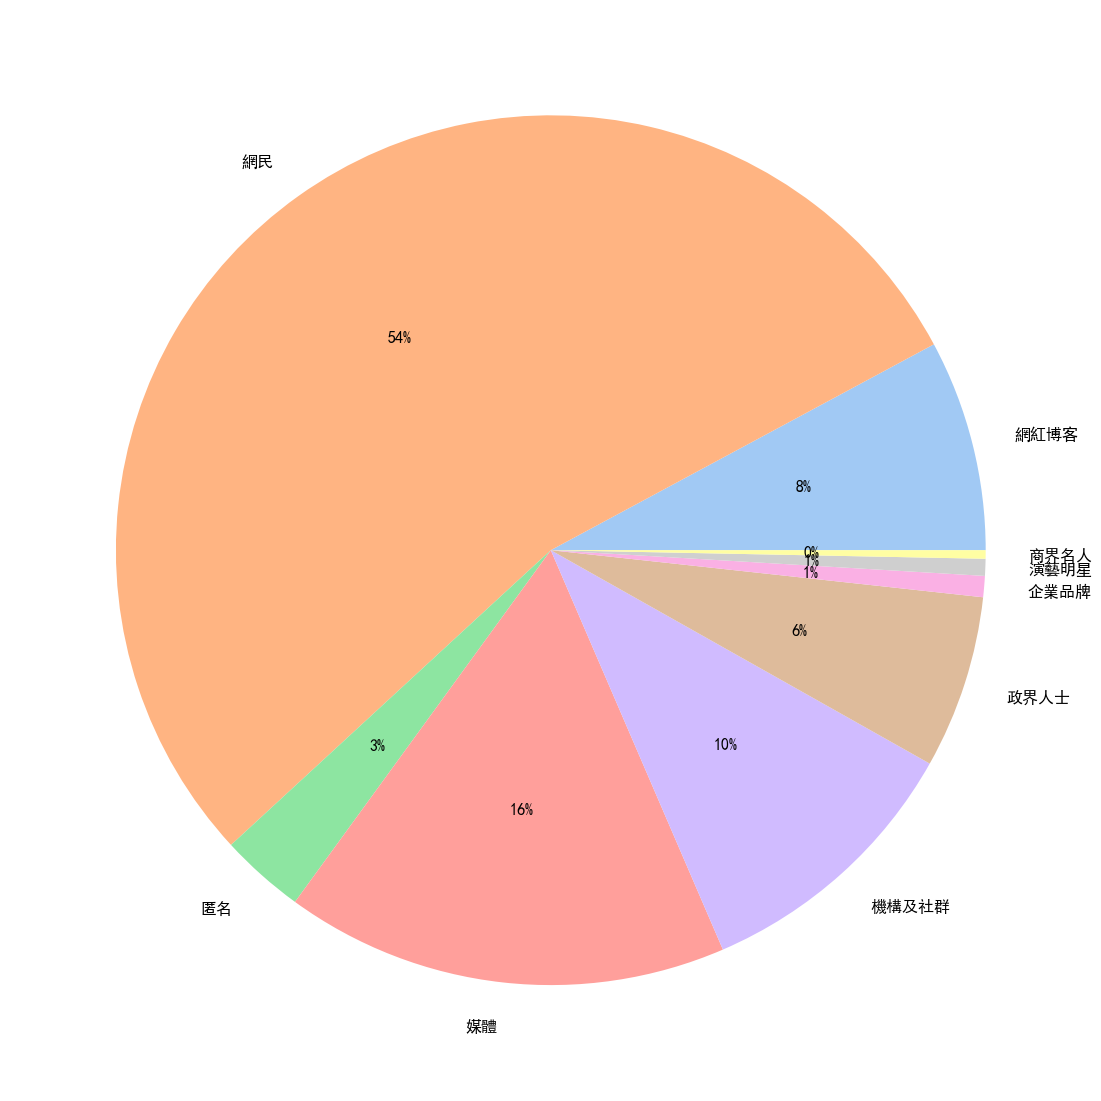

In [6]:
font = {'family' : 'SimHei',
        'weight' : 'bold',
        'size'   : '16'}
plt.rc('font', **font)               # 步驟一（設置字體的更多屬性）
plt.rc('axes', unicode_minus=False)

from matplotlib.font_manager import FontProperties  # 導入FontProperties
font = FontProperties(fname="SimHei.ttf", size=14)  # 設置字體

by_author = author_count1
labels=['網紅博客','網民','匿名','媒體','機構及社群','政界人士','企業品牌','演藝明星','商界名人']
colors = sns.color_palette('pastel')

plt.figure(figsize=(20,20))
plt.pie(by_author,labels=labels,colors=colors,autopct='%.0f%%')

plt.show()

In [7]:
publisher_count = data['Facebook - 群組 或專頁'].sum(),data['香港高登'].sum(),data['香港01'].sum(),data['LIHKG'].sum(),data['香港討論區-discuss.com.hk'].sum(),data['雅虎(香港)'].sum(),data['親子王國'].sum(),data['香港討論區-uwants.com'].sum(),data['Facebook香港'].sum()
publisher_count1 = np.array(list(publisher_count))

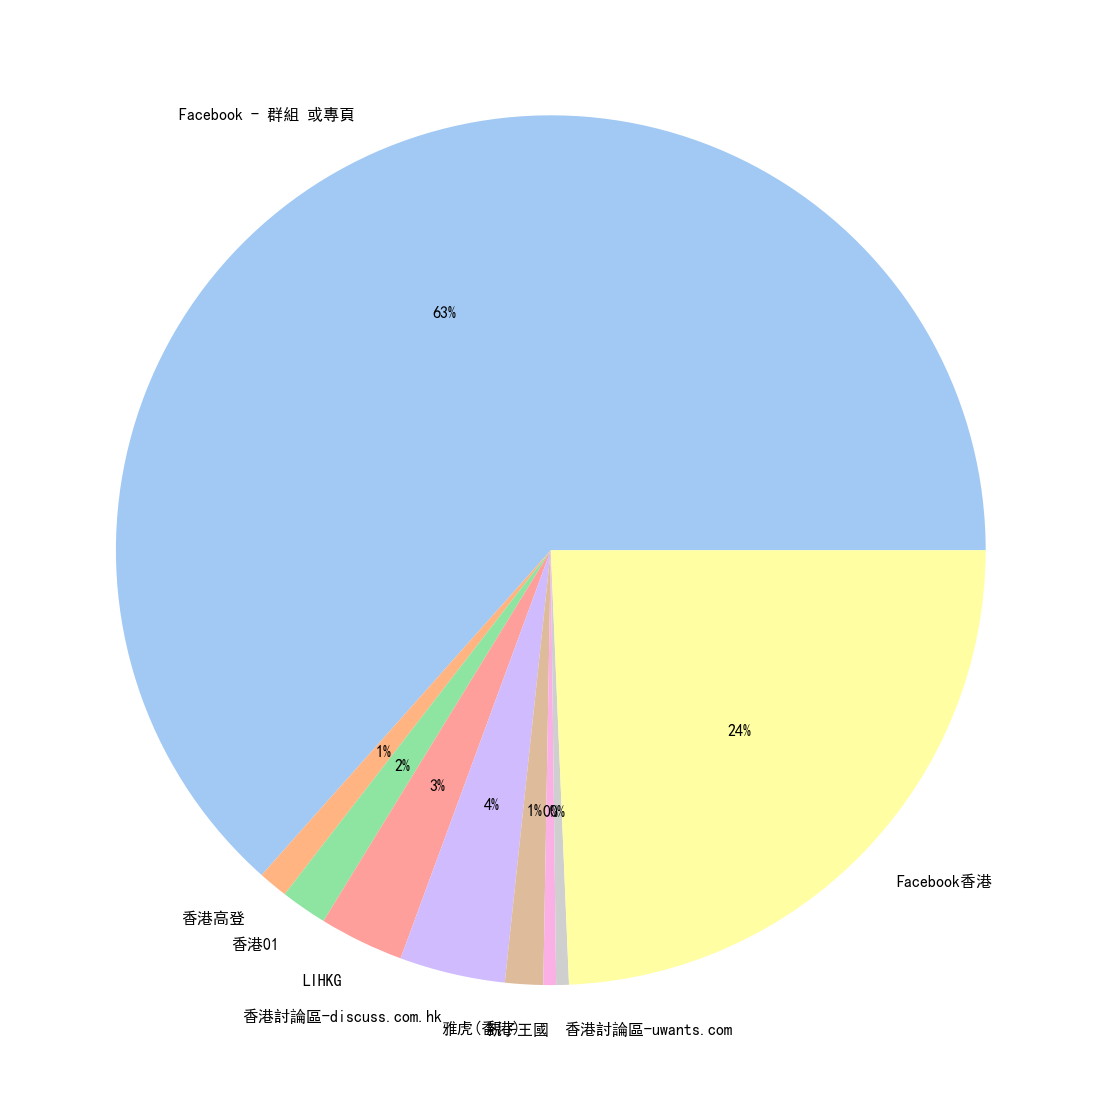

In [8]:
by_publisher= publisher_count1

labels= ['Facebook - 群組 或專頁',
'香港高登',
'香港01',
'LIHKG',
'香港討論區-discuss.com.hk',
'雅虎(香港)',
'親子王國',
'香港討論區-uwants.com',
'Facebook香港'
]

colors = sns.color_palette('pastel')

plt.figure(figsize=(20,20))
plt.pie(by_publisher,labels=labels,colors=colors,autopct='%.0f%%')

plt.show()

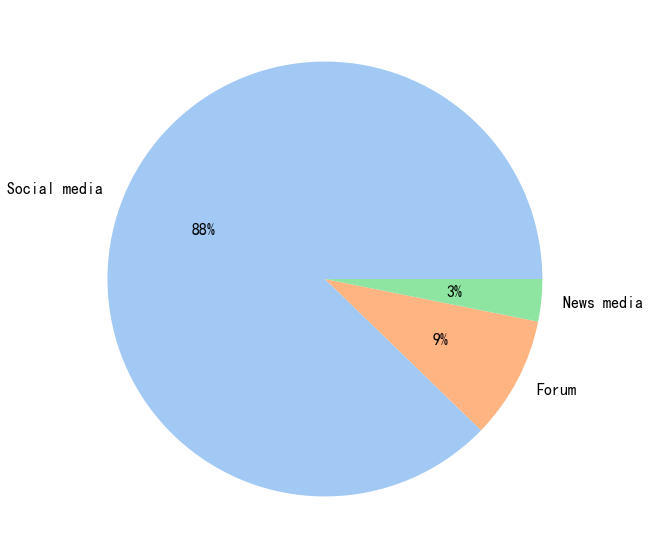

In [9]:
#further classify the publisher to major type
Social_media = data['Facebook - 群組 或專頁']+data['Facebook香港']
Forum = data['香港高登']+data['LIHKG']+data['香港討論區-discuss.com.hk']+data['親子王國']+data['香港討論區-uwants.com']
News_media = data['香港01']+data['雅虎(香港)']

publisher_count_r= np.array([Social_media.sum(),Forum.sum(),News_media.sum()])
by_publisher_r = publisher_count_r
labels = ['Social media','Forum','News media']

colors = sns.color_palette('pastel')

plt.figure(figsize=(10,10))
plt.pie(by_publisher_r,labels=labels,colors=colors,autopct='%.0f%%')

plt.show()

In [10]:
#Establish the model
X = np.array(data.loc[:,'author_total']).reshape(-1,1)
y = np.array(data.loc[:,'departure_total']).reshape(-1,)


In [11]:
X = X.astype(np.float64)
y = y.astype(np.float64)

In [12]:
y

array([ 0.985,  4.806, 21.541, 22.339, 20.41 , 19.458, 17.649, 15.481,
       16.059, 19.47 , 20.897, 18.63 , 18.055, 17.785, 15.329, 15.866,
       17.555, 20.644, 20.601,  0.   , 86.081, 17.348,  1.263,  0.531,
        1.301,  3.463,  1.742,  2.505,  1.385,  2.296,  4.619, 16.43 ,
       16.685, 16.351, 16.124, 13.083, 11.633,  9.233,  9.835,  9.007,
        8.209,  9.958, 10.704,  3.168,  4.105,  2.795,  1.441,  0.915,
        1.017,  1.351,  0.   , 52.016, 17.093,  0.928,  0.763,  1.549,
        1.868,  2.856,  2.401,  1.344,  1.973,  4.947,  0.473,  0.579,
        0.734,  0.477,  0.871,  0.706,  0.547,  0.64 ,  0.399,  0.608,
        0.537,  0.709,  0.559,  0.64 ,  0.918,  0.438,  0.681,  0.76 ,
        0.   , 52.22 , 18.485,  0.878,  0.5  ,  1.761,  2.061,  3.269,
        2.757,  1.414,  1.516,  4.818,  0.826,  0.644,  0.728,  0.83 ,
        0.56 ,  0.749,  0.682,  0.594,  0.549,  0.799,  0.526,  0.563,
        0.634,  0.579,  0.787,  0.535,  0.633,  0.702,  0.444,  0.   ,
      

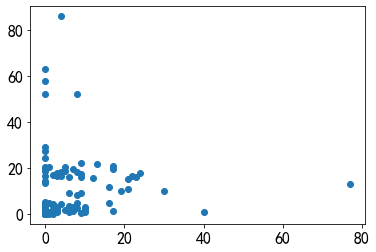

In [13]:
plt.scatter(X,y)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,random_state = 0)

NameError: name 'PolynomialRegression' is not defined

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])

In [ ]:
X_train

In [ ]:
from sklearn.metrics import mean_squared_error

poly_reg = PolynomialRegression(degree=2)
poly_reg.fit(X_train, y_train)

X_train = poly_reg.fit_transform(X_train)
y_train = poly_reg.fit_transform(y_train)

print(model.score(X_train, y_train))
print(mean_squared_error(y_test, y_predict))

In [ ]:
type(X_train)

In [ ]:
#Cross validation
cv = KFold(n_splits=2, random_state=1, shuffle=True)
#Build Model
model = PolynomialRegression(degree=3)
#Evaluate model using LOOCV
scores = cross_val_score(model, X, y,cv=5, n_jobs=-1)
#Review MSE
np.mean(scores)

In [ ]:
def plot_model(model):
    X_plot = np.linspace(0,10000, 20000).reshape(20000, 1)
    y_plot = model.predict(X_plot)

    plt.scatter(X, y)
    plt.plot(X_plot[:,0], y_plot, color='r')
    plt.axis([-1000,20000, 0, 20000])
    plt.show()

plot_model(poly_reg)

In [ ]:
#Lasso Regression
from sklearn.linear_model import Lasso

def LassoRegression(degree, alpha):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lasso_reg", Lasso(alpha=alpha))
    ])

In [ ]:
lasso1_reg = LassoRegression(3,1)
lasso1_reg.fit(X_train, y_train)

y1_predict = lasso1_reg.predict(X_test)
mean_squared_error(y_test, y1_predict)

In [ ]:
plot_model(lasso1_reg)

In [ ]:
#Ridge Regression
from sklearn.linear_model import Ridge

def RidgeRegression(degree, alpha):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("ridge_reg", Ridge(alpha=alpha))
    ])

In [ ]:
ridge1_reg = RidgeRegression(3, 1)
ridge1_reg.fit(X_train, y_train)

y1_predict = ridge1_reg.predict(X_test)
mean_squared_error(y_test, y1_predict)

In [ ]:
plot_model(ridge1_reg)